# UK Validation of ECMWF ERA5 model runs CCI satilite SST

In [23]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition


In [24]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)

In [25]:
file = '/Users/ph290/Downloads/UK/era5_uk_surfacetemperature_ym.nc'
file_bottom = '/Users/ph290/Downloads/UK/era5_uk_bottomtemperature_ym.nc'

# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_year_mean_mv.nc'
# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5.nc'
year_for_basic_comparison = 2010
min_year_for_comparison = 1986
max_year_for_comparison = 2016

In [26]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.0-v02.0-fv01.0_regridded_yearmean.nc')
obs_cube_all -= 273.15
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2008_all_tm.nc','sea_surface_temperature')

In [27]:
obs_cube_all = obs_cube_all
try:
    iris.coord_categorisation.add_year(obs_cube_all, 'time', name='year')
except:
    pass

print obs_cube_all.coord('year').points


obs_cube = obs_cube_all[np.where((obs_cube_all.coord('year').points >= min_year_for_comparison) & (obs_cube_all.coord('year').points <= max_year_for_comparison))]
obs_cube = obs_cube.collapsed('time',iris.analysis.MEAN)
# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]



[1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016]


In [28]:
# cube = iris.load_cube(file)[0]

cube_all = iris.load_cube(file)
try:
    iris.coord_categorisation.add_year(cube_all, 'time', name='year')
except:
    pass

cube_all = cube_all.aggregated_by('year', iris.analysis.MEAN)


# cube_all.coord('longitude').points = cube_all.coord('longitude').points+180
# cube_all.data = np.ma.masked_array(cube_all.data)
# cube_all.data.fill_value = 9.96920997e+36
cube_all.data = np.ma.masked_where(cube_all.data == 9.96920997e+36, cube_all.data)
# iris.coord_categorisation.add_year(cube_all, 'time', name='year')
cube = cube_all[np.where((cube_all.coord('year').points >= min_year_for_comparison) & (cube_all.coord('year').points <= max_year_for_comparison))]
cube = cube.collapsed('time',iris.analysis.MEAN)

In [29]:
# cube_all_bottom = iris.load_cube(file_bottom)
# try:
#     iris.coord_categorisation.add_year(cube_all_bottom, 'time', name='year')
# except:
#     pass

# cube_all_bottom = cube_all_bottom.aggregated_by('year', iris.analysis.MEAN)
# cube_all_bottom.data = np.ma.masked_where(cube_all_bottom.data == 9.96920997e+36, cube_all_bottom.data)
# # cube_bottom = cube_all_bottom[np.where(cube_all_bottom.coord('year').points == year_for_basic_comparison)]
# # cube_bottom = cube_bottom.collapsed('time',iris.analysis.MEAN)

In [30]:
# cube = iris.load_cube(file)
# cube.coord('longitude').points = cube.coord('longitude').points+180
# cube = cube.collapsed('time',iris.analysis.MEAN)

In [31]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

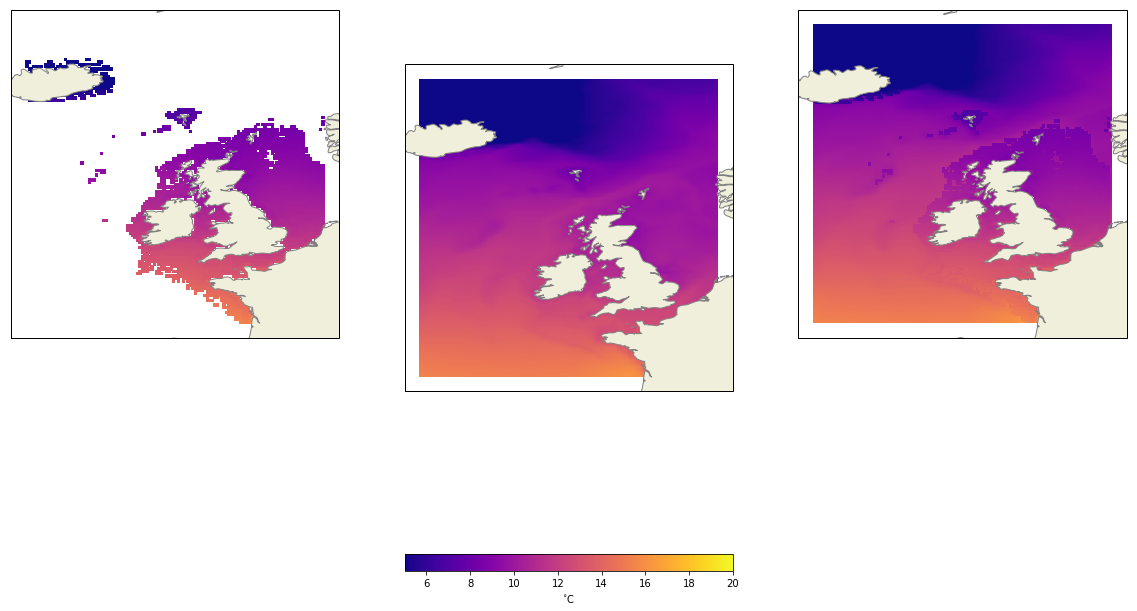

In [32]:
cube_0 = cube.copy()
cube_0_data = cube_0.data
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=5,vmax=20,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

#########

lon_west = -20.0
lon_east = 5.0
lat_south = 45.0
lat_north = 70.0

obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

obs_cube_data = obs_cube_region.data
lat2 = obs_cube_region.coord('latitude').points
lon2 = obs_cube_region.coord('longitude').points

ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=5,vmax=20,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')
cbar = plt.colorbar(p,orientation='horizontal')
cbar.set_label('$^{\circ}$C')
####

ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=5,vmax=20,
                cmap='plasma')
p = ax.pcolormesh(lon, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=5,vmax=20,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

# plt.gca().coastlines('10m')

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/GBR_s2p3.png',dpi=600)
plt.show()

## Directly comparing model and satilite on common grids (regridding model to satilite grid)

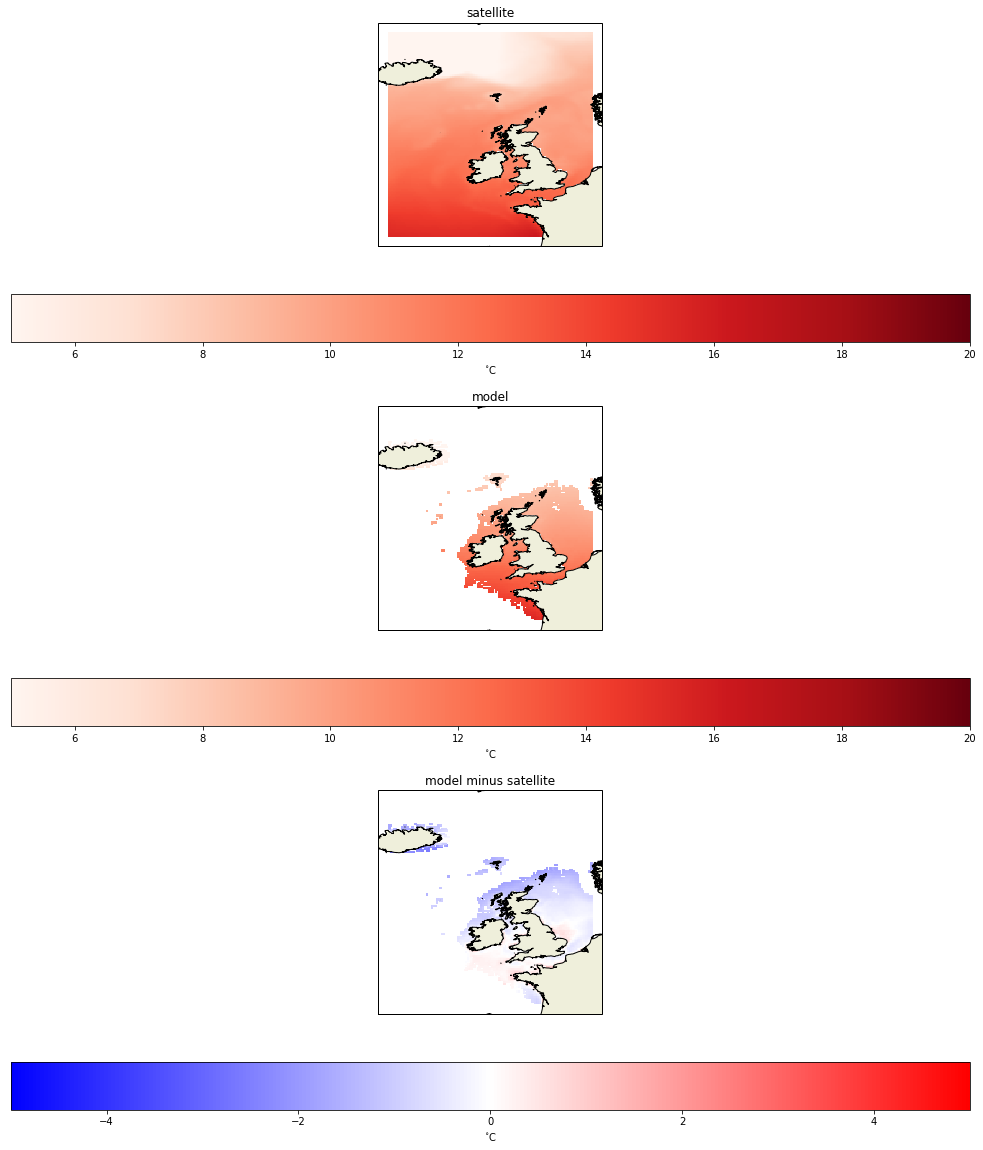

In [33]:

lon_west = -20.0
lon_east = 5.0
lat_south = 45.0
lat_north = 70.0



c_model = extract_region(cube,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

c_crw_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_crw_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system =c_crw_region.coord('longitude').coord_system

c_crw_region_regridded = c_crw_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


crw_data = c_crw_region_regridded.data
lat_crw = c_crw_region_regridded.coord('latitude').points
lon_crw = c_crw_region_regridded.coord('longitude').points

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p1 = ax1.pcolormesh(lon_crw, lat_crw,crw_data,
                transform=ccrs.PlateCarree(),vmin=5,vmax=20,
                cmap='Reds')
cbar = plt.colorbar(p1,orientation='horizontal')
cbar.set_label('$^{\circ}$C')

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree())
p2 = ax2.pcolormesh(lon_crw, lat_crw,model_data,
                transform=ccrs.PlateCarree(),vmin=5,vmax=20,
                cmap='Reds')
cbar = plt.colorbar(p2,orientation='horizontal')
cbar.set_label('$^{\circ}$C')

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree())

# p3 = ax3.pcolormesh(lon_crw, lat_crw,np.roll(model_data,np.shape(model_data)[1]/2,axis=1) - crw_data,
p3 = ax3.pcolormesh(lon_crw, lat_crw,model_data - crw_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='bwr')
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')

ax1.add_feature(land_10m, edgecolor='k')
ax2.add_feature(land_10m, edgecolor='k')
ax3.add_feature(land_10m, edgecolor='k')

ax1.title.set_text('satellite')
ax2.title.set_text('model')
ax3.title.set_text('model minus satellite')



plt.show()

basically we've got to the point where the areas where it is hot/cold relate to warm/cold currents. In warm conditions where density is ~linaerly dependent on temperature this is probably not an issue, and we can be confident in the variability, but at high latitudes, one would probably want to corrent the temperatures to ensure the density was responding appropriately to variability. In future runs, if theer was evidence that that there was a chnge in teh large-scale currents feeding an area, that could also be factored in, based on the assumption that the difference between the ECMWF run and observed SST.

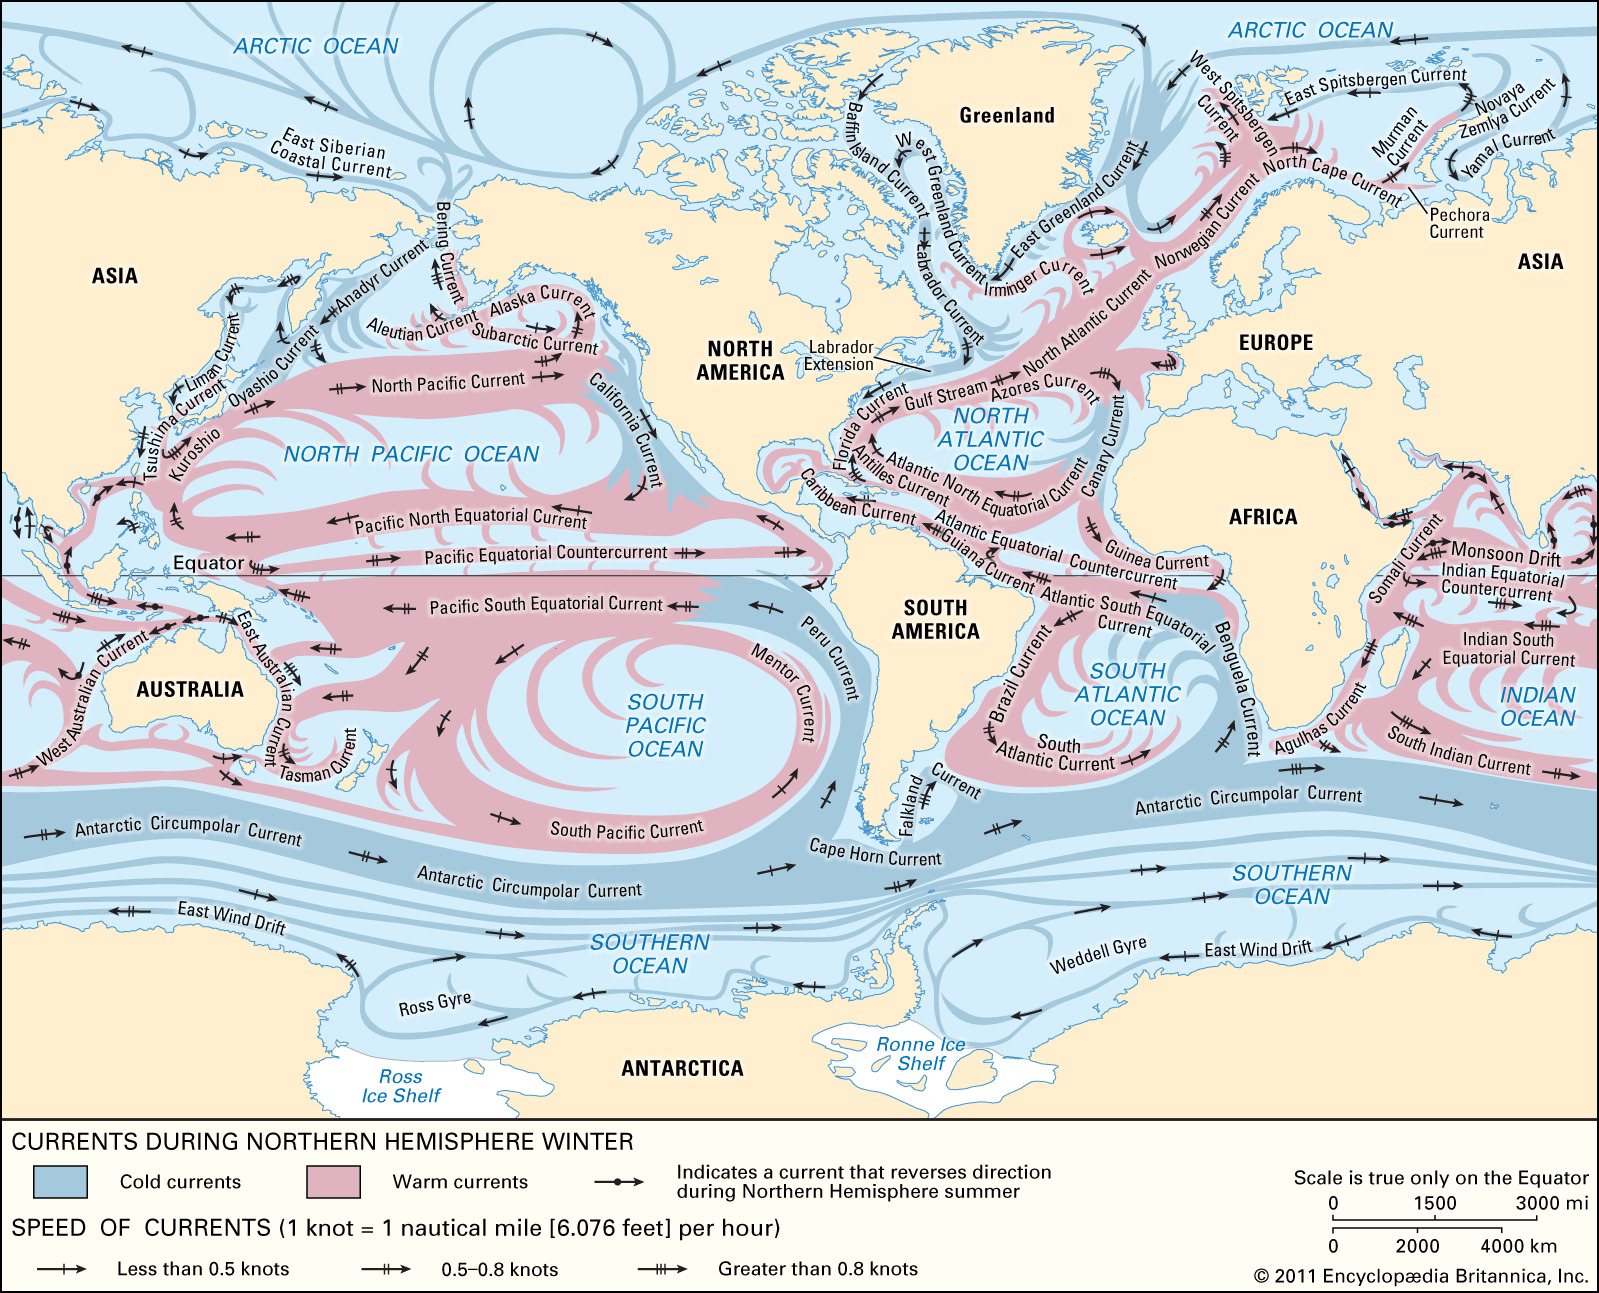

In [34]:
from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/ocean-systems-world.jpg') 

## Model minus CCI satilite SST with depth plotted as contours

Comparison of annual mean for year specified at the top of the page

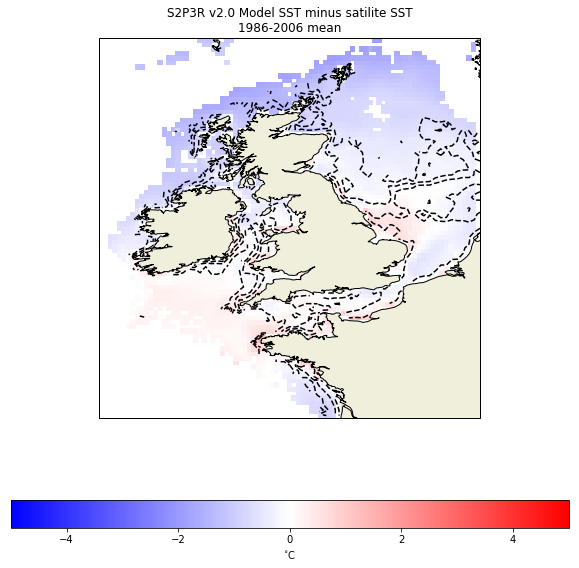

In [35]:
lon_west = -12.0
lon_east = 5.0
lat_south = 45.0
lat_north = 62.0



c_model = extract_region(cube,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

c_cci_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_cci_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system =c_cci_region.coord('longitude').coord_system

c_cci_region_regridded = c_cci_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


cci_data = c_cci_region_regridded.data
lat_cci = c_cci_region_regridded.coord('latitude').points
lon_cci = c_cci_region_regridded.coord('longitude').points


bathy_file = '/Users/ph290/Downloads/ETOPO1_Bed_g_gmt4_low_res.nc'
bathy_cube = iris.load_cube(bathy_file)
bathy_cube.data = np.ma.masked_where(bathy_cube.data >= 0.0,bathy_cube.data)
bathy_cube.data = np.ma.masked_where(bathy_cube.data < -100.0,bathy_cube.data)



bathy_cube = extract_region(bathy_cube,lon_west,lon_east,lat_south,lat_north)

bathy_data = bathy_cube.data
lat_bathy = bathy_cube.coord('latitude').points
lon_bathy = bathy_cube.coord('longitude').points

lon_west2 = lon_west
lon_east2 = lon_east
lat_south2 = lat_south
lat_north2 = lat_north

plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west2, lon_east2, lat_south2, lat_north2), crs=ccrs.PlateCarree())

# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')

p3 = ax3.pcolormesh(lon_cci, lat_model,model_data - cci_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='bwr')
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')


ax3.add_feature(land_10m, edgecolor='k')

ax3.title.set_text('S2P3R v2.0 Model SST minus satilite SST\n1986-2006 mean')


plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/uk_sst_validation_map.png',dpi=300)




## GBR timeseries comparison model v. CCI

In [36]:
def compariable_across_grids(cube1,cube2,lon_west,lon_east,lat_south,lat_north):
    cube1_region = extract_region(cube1,lon_west,lon_east,lat_south,lat_north)
    cube2_region = extract_region(cube2,lon_west,lon_east,lat_south,lat_north)
    
    cube2_region.coord('latitude').coord_system = cube1_region.coord('latitude').coord_system
    cube2_region.coord('longitude').coord_system =cube1_region.coord('longitude').coord_system

    cube1_region_regridded = cube1_region.regrid(cube2_region, iris.analysis.Linear())
    cube2_region.data.mask = cube1_region_regridded.data.mask


    cube2_region.data[np.where(cube2_region.data < -20.0)] = cube2_region.data.fill_value
    cube2_region.data[np.where(cube2_region.data >100.0)] = cube2_region.data.fill_value
    cube2_region.data = np.ma.masked_where(cube2_region.data == cube2_region.data.fill_value, cube2_region.data)

    cube1_region_regridded.data[np.where(cube1_region_regridded.data < -20.0)] = cube1_region_regridded.data.fill_value
    cube1_region_regridded.data[np.where(cube1_region_regridded.data > 100.0)] = cube1_region_regridded.data.fill_value
    cube1_region_regridded.data = np.ma.masked_where(cube1_region_regridded.data == cube1_region_regridded.data.fill_value, cube1_region_regridded.data)
    return cube1_region_regridded,cube2_region

In [37]:
model_region_regridded,obs_region = compariable_across_grids(cube_all,obs_cube_all,-20,5,45,70)
# model_bottom_region_regridded,obs_region = compariable_across_grids(cube_all_bottom,obs_cube_all,142,156,-29,-10)


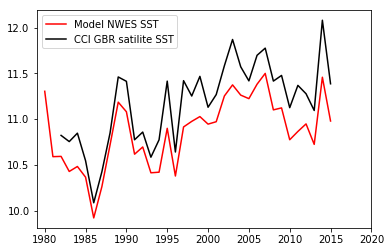

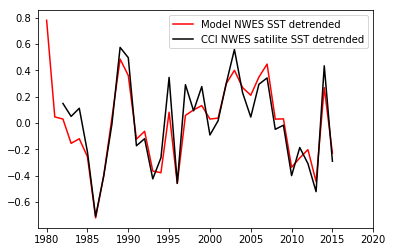

In [38]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal


def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

cube_all_region_area_avg = area_avg(model_region_regridded)
obs_cube_all_region_area_avg = area_avg(obs_region)

# cube_all_region_area_avg_bottom = area_avg(model_bottom_region_regridded)


plotting_range = [1979,2016]
cube_all_region_area_avg = select_range(cube_all_region_area_avg, plotting_range)
obs_cube_all_region_area_avg = select_range(obs_cube_all_region_area_avg, plotting_range)

# cube_all_region_area_avg_bottom = select_range(cube_all_region_area_avg_bottom, plotting_range)


# fig, ax1 = plt.subplots()

# ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')

# # ax2 = ax1.twinx() 

# ax.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')

# ax1.set_xlim([2003,2017])
# plt.legend()
# plt.show()


fig, ax1 = plt.subplots()

ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model NWES SST')
ax1.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CCI GBR satilite SST')
# ax1.plot(cube_all_region_area_avg_bottom.coord('year').points,cube_all_region_area_avg_bottom.data,'g',label='Model GBR bottom temperature')

ax1.set_xlim([1979,2020])
plt.legend()
plt.show()


fig, ax1 = plt.subplots()

ax1.plot(cube_all_region_area_avg.coord('year').points,signal.detrend(cube_all_region_area_avg.data),'r',label='Model NWES SST detrended')
ax1.plot(obs_cube_all_region_area_avg.coord('year').points,signal.detrend(obs_cube_all_region_area_avg.data),'k',label='CCI NWES satilite SST detrended')
# ax1.plot(cube_all_region_area_avg_bottom.coord('year').points,cube_all_region_area_avg_bottom.data,'g',label='Model GBR bottom temperature')

ax1.set_xlim([1979,2020])
plt.legend()
plt.show()



*thoughts:* is the model drifting to the right temperature after a long spinup stage? Start the run earlier and/or change the initialisation temperature and re-run.

## plotting by region


In [39]:
def common_years(cube1,cube2):
    cube1_yrs = cube1.coord('year').points
    cube2_yrs = cube2.coord('year').points
    years= np.intersect1d(cube1_yrs,cube2_yrs)
    cube1_ind= np.in1d(cube1_yrs,cube2_yrs)
    cube2_ind= np.in1d(cube2_yrs,cube1_yrs)
    return years,cube1.data[cube1_ind],cube2.data[cube2_ind]




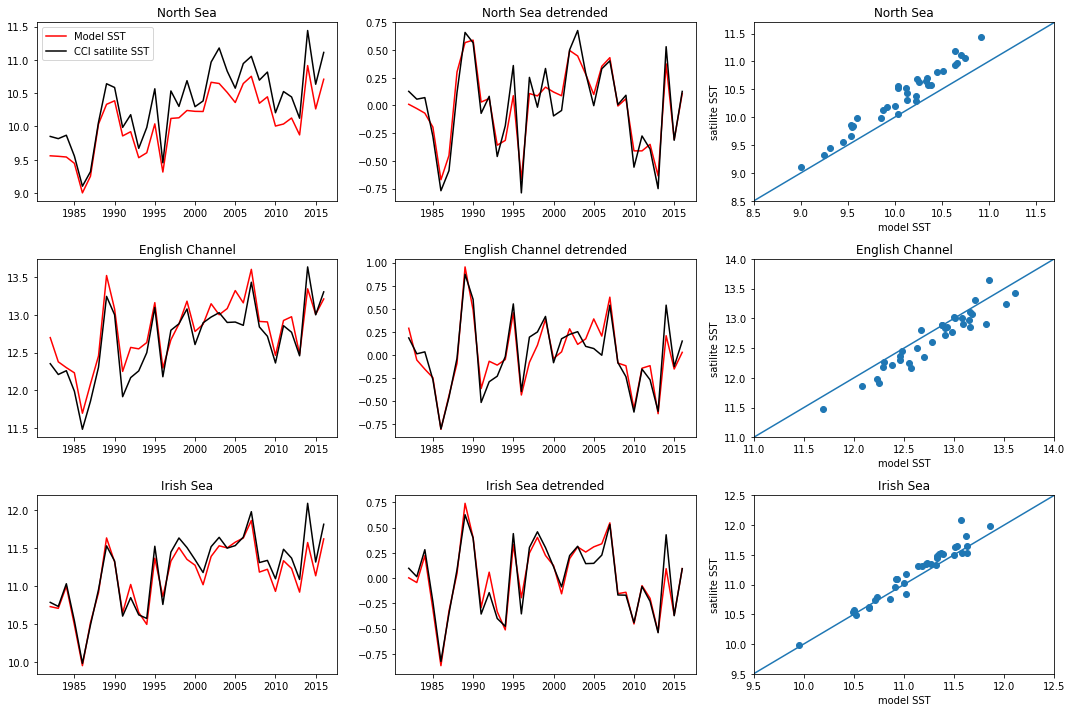

In [40]:
def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

lon_west = -3.5
lon_east = 5.0
lat_south = 51
lat_north = 59
cube_all_region_area_avg_1 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
cube_all_region_area_avg_2 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lon_west = -6.5
lon_east = -2.5
lat_south = 52.0
lat_north = 55.5
cube_all_region_area_avg_3 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))






fig,axes= plt.subplots(nrows=3, ncols=3,figsize=(15, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,0].plot(yr,y1,'r',label='Model SST')
axes[0,0].plot(yr,y2,'k',label='CCI satilite SST')
axes[0,0].set_title('North Sea')

axes[0,1].plot(yr,signal.detrend(y1),'r',label='Model SST')
axes[0,1].plot(yr,signal.detrend(y2),'k',label='CCI satilite SST')
axes[0,1].set_title('North Sea detrended')

axes[0,2].scatter(y1,y2,label='Model SST v. satilite SST')
axes[0,2].set_xlabel('model SST')
axes[0,2].set_ylabel('satilite SST')
axes[0,2].plot([0,100],[0,100])
axes[0,2].set_xlim([8.5,11.7])
axes[0,2].set_ylim([8.5,11.7])
axes[0,2].set_title('North Sea')

yr,y1,y2 = common_years(cube_all_region_area_avg_2,obs_cube_all_region_area_avg_2)

axes[1,0].plot(yr,y1,'r',label='Model GBR SST')
axes[1,0].plot(yr,y2,'k',label='CCI satilite SST')
axes[1,0].set_title('English Channel')

axes[1,1].plot(yr,signal.detrend(y1),'r',label='Model SST')
axes[1,1].plot(yr,signal.detrend(y2),'k',label='CCI satilite SST')
axes[1,1].set_title('English Channel detrended')

axes[1,2].scatter(y1,y2,label='Model SST v. satilite SST')
axes[1,2].set_xlabel('model SST')
axes[1,2].set_ylabel('satilite SST')
axes[1,2].plot([0,100],[0,100])
axes[1,2].set_xlim([11.0,14.0])
axes[1,2].set_ylim([11.0,14.0])
axes[1,2].set_title('English Channel')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[2,0].plot(yr,y1,'r',label='Model SST')
axes[2,0].plot(yr,y2,'k',label='CCI satilite SST')
axes[2,0].set_title('Irish Sea')

axes[2,1].plot(yr,signal.detrend(y1),'r',label='Model SST')
axes[2,1].plot(yr,signal.detrend(y2),'k',label='CCI satilite SST')
axes[2,1].set_title('Irish Sea detrended')

axes[2,2].scatter(y1,y2,label='Model SST v. satilite SST')
axes[2,2].set_xlabel('model SST')
axes[2,2].set_ylabel('satilite SST')
axes[2,2].plot([0,100],[0,100])
axes[2,2].set_xlim([9.5,12.5])
axes[2,2].set_ylim([9.5,12.5])
axes[2,2].set_title('Irish Sea')

axes[0,0].legend(fancybox=True)

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/uk_sst_validatino.pdf')
plt.tight_layout()


/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


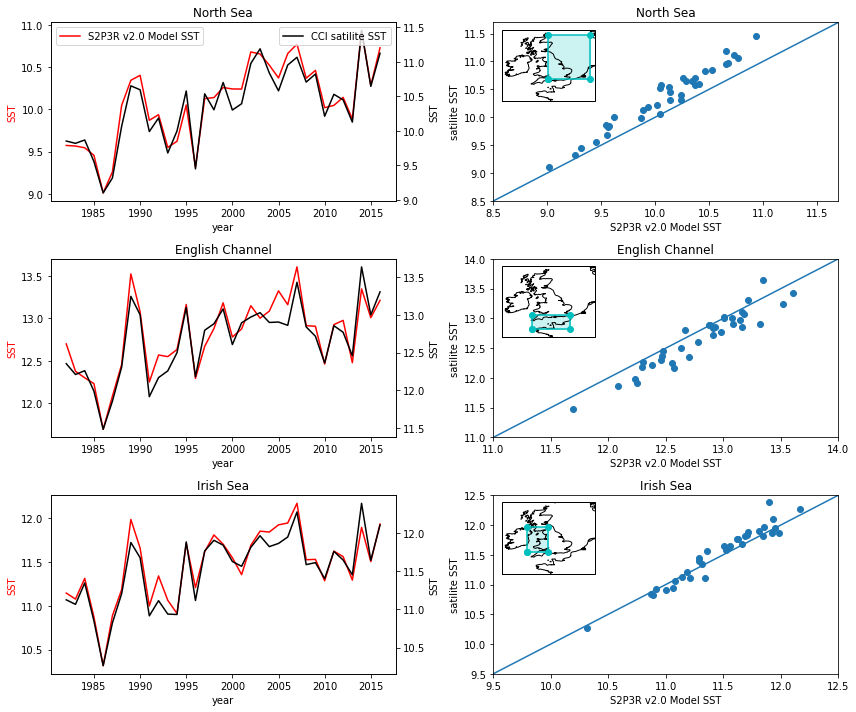

In [41]:
projection=ccrs.PlateCarree()

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
cube_all_region_area_avg_1 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
cube_all_region_area_avg_2 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))
lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
cube_all_region_area_avg_3 = area_avg(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_avg(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))


fig,axes= plt.subplots(nrows=3, ncols=2,figsize=(12, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,0].plot(yr,y1,'r',label='S2P3R v2.0 Model SST')
ax00b = axes[0,0].twinx() 
ax00b.plot(yr,y2,'k',label='CCI satilite SST')
axes[0,0].set_title('North Sea')
axes[0,0].set_ylabel('SST', color='r') 
ax00b.set_ylabel('SST', color='k') 


axes[0,1].scatter(y1,y2,label='S2P3R v2.0 Model SST v. satilite SST')
axes[0,1].set_xlabel('S2P3R v2.0 Model SST')
axes[0,1].set_ylabel('satilite SST')
axes[0,1].plot([0,100],[0,100])
axes[0,1].set_xlim([8.5,11.7])
axes[0,1].set_ylim([8.5,11.7])
axes[0,1].set_title('North Sea')

yr,y1,y2 = common_years(cube_all_region_area_avg_2,obs_cube_all_region_area_avg_2)

axes[1,0].plot(yr,y1,'r',label='S2P3R v2.0 Model SST')
ax10b = axes[1,0].twinx() 
ax10b.plot(yr,y2,'k',label='CCI satilite SST')
axes[1,0].set_title('English Channel')
axes[1,0].set_ylabel('SST', color='r') 
ax10b.set_ylabel('SST', color='k') 

axes[1,1].scatter(y1,y2,label='S2P3R v2.0 Model SST v. satilite SST')
axes[1,1].set_xlabel('S2P3R v2.0 Model SST')
axes[1,1].set_ylabel('satilite SST')
axes[1,1].plot([0,100],[0,100])
axes[1,1].set_xlim([11.0,14.0])
axes[1,1].set_ylim([11.0,14.0])
axes[1,1].set_title('English Channel')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[2,0].plot(yr,y1,'r',label='S2P3R v2.0 Model SST')
ax20b = axes[2,0].twinx() 
ax20b.plot(yr,y2,'k',label='CCI satilite SST')
axes[2,0].set_title('Irish Sea')
axes[2,0].set_ylabel('SST', color='r') 
ax20b.set_ylabel('SST', color='k') 

axes[2,1].scatter(y1,y2,label='S2P3R v2.0 Model SST v. satilite SST')
axes[2,1].set_xlabel('S2P3R v2.0 Model SST')
axes[2,1].set_ylabel('satilite SST')
axes[2,1].plot([0,100],[0,100])
axes[2,1].set_xlim([9.5,12.5])
axes[2,1].set_ylim([9.5,12.5])
axes[2,1].set_title('Irish Sea')

axes[0,0].legend(fancybox=True)
ax00b.legend(loc=1,fancybox=True)

axes[0,0].set_xlabel('year', color='k') 
axes[1,0].set_xlabel('year', color='k') 
axes[2,0].set_xlabel('year', color='k') 


inset_x = 0
inset_y = 1
inset_size = 0.4

inset_ax1 = plt.axes([0, 0, 1, 1], projection=projection)
inset_ax1.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax1.coastlines('50m')
ip1 = InsetPosition(axes[0,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax1.set_axes_locator(ip1)
lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax1.plot(x, y, 'c',marker='o', transform=projection)
inset_ax1.fill(x, y, color='c', transform=projection, alpha=0.2)


inset_ax2 = plt.axes([0, 0, 2, 2], projection=projection)
inset_ax2.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax2.coastlines('50m')
ip2 = InsetPosition(axes[1,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax2.set_axes_locator(ip2)
lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax2.plot(x, y, 'c',marker='o', transform=projection)
inset_ax2.fill(x, y, color='c', transform=projection, alpha=0.2)


inset_ax3 = plt.axes([0, 0, 3, 3], projection=projection)
inset_ax3.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax3.coastlines('50m')
ip3 = InsetPosition(axes[2,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax3.set_axes_locator(ip3)
lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
x3, y3 = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax3.plot(x3, y3, 'c',marker='o', transform=projection)
inset_ax3.fill(x3, y3, color='c', transform=projection, alpha=0.2)

plt.tight_layout()


plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/uk_sst_validation1.pdf')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/uk_sst_validation1.png')

plt.tight_layout()



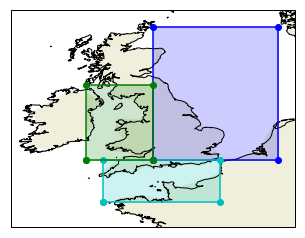

In [42]:

projection = ccrs.PlateCarree()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.coastlines('10m')

lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
ax.plot(x, y, 'b',marker='o', transform=projection)
ax.fill(x, y, color='b', transform=projection, alpha=0.2)

lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
ax.plot(x, y, 'c',marker='o', transform=projection)
ax.fill(x, y, color='c', transform=projection, alpha=0.2)

lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
ax.plot(x, y, 'g',marker='o', transform=projection)
ax.fill(x, y, color='g', transform=projection, alpha=0.2)

# ax.gridlines()

In [43]:
dir(ccrs)

['ABCMeta',
 'AlbersEqualArea',
 'AzimuthalEquidistant',
 'CRS',
 'EuroPP',
 'GOOGLE_MERCATOR',
 'Geocentric',
 'Geodetic',
 'Geostationary',
 'Globe',
 'Gnomonic',
 'InterruptedGoodeHomolosine',
 'LambertAzimuthalEqualArea',
 'LambertConformal',
 'LambertCylindrical',
 'Mercator',
 'Miller',
 'Mollweide',
 'NearsidePerspective',
 'NorthPolarStereo',
 'OSGB',
 'OSNI',
 'Orthographic',
 'PROJ4_VERSION',
 'PlateCarree',
 'Projection',
 'Robinson',
 'RotatedGeodetic',
 'RotatedPole',
 'Sinusoidal',
 'SouthPolarStereo',
 'Stereographic',
 'TransverseMercator',
 'UTM',
 'WGS84_SEMIMAJOR_AXIS',
 'WGS84_SEMIMINOR_AXIS',
 '_BoundaryPoint',
 '_CylindricalProjection',
 '_RectangularProjection',
 '_Satellite',
 '_WarpedRectangularProjection',
 '__builtins__',
 '__doc__',
 '__document_these__',
 '__file__',
 '__name__',
 '__package__',
 '__warningregistry__',
 '_ellipse_boundary',
 '_find_first_ge',
 'absolute_import',
 'abstractproperty',
 'cartopy',
 'division',
 'epsg',
 'math',
 'np',
 'prep',

95th percentile temperature

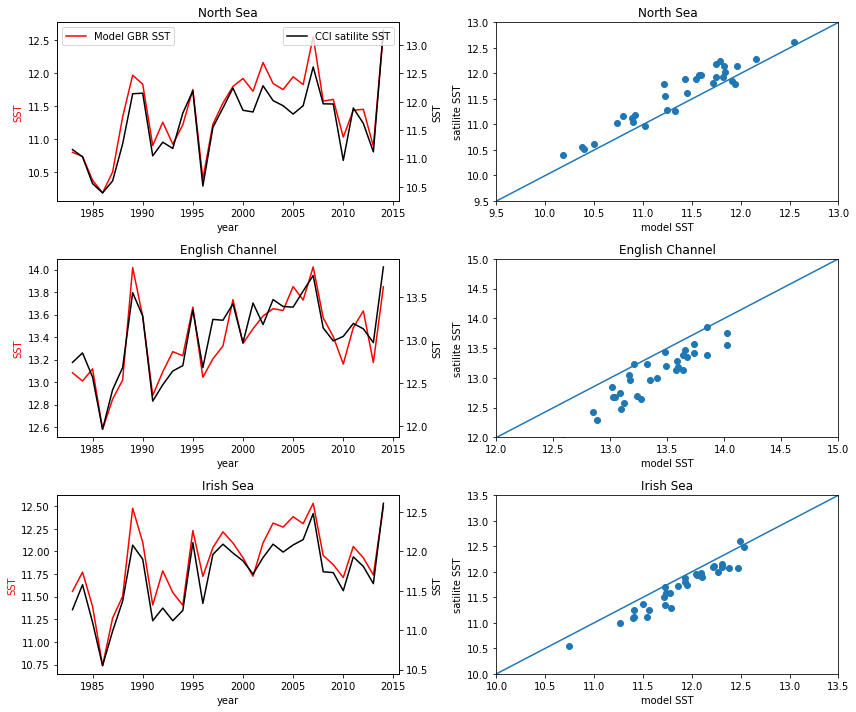

In [44]:
def area_percentile(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.PERCENTILE, percent=[95])


def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

plotting_range = [1982,2015]

lon_west = -3.5
lon_east = 5.0
lat_south = 51
lat_north = 59
cube_all_region_area_avg_1 = area_percentile(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_percentile(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

cube_all_region_area_avg_1 = select_range(cube_all_region_area_avg_1, plotting_range)
obs_cube_all_region_area_avg_1 = select_range(obs_cube_all_region_area_avg_1, plotting_range)

lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
cube_all_region_area_avg_2 = area_percentile(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_percentile(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

cube_all_region_area_avg_2 = select_range(cube_all_region_area_avg_2, plotting_range)
obs_cube_all_region_area_avg_2 = select_range(obs_cube_all_region_area_avg_2, plotting_range)

lon_west = -6.5
lon_east = -2.5
lat_south = 52.0
lat_north = 55.5
cube_all_region_area_avg_3 = area_percentile(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_percentile(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

cube_all_region_area_avg_3 = select_range(cube_all_region_area_avg_3, plotting_range)
obs_cube_all_region_area_avg_3 = select_range(obs_cube_all_region_area_avg_3, plotting_range)



fig,axes= plt.subplots(nrows=3, ncols=2,figsize=(12, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,0].plot(yr,y1,'r',label='Model GBR SST')
ax00b = axes[0,0].twinx() 
ax00b.plot(yr,y2,'k',label='CCI satilite SST')
axes[0,0].set_title('North Sea')
axes[0,0].set_ylabel('SST', color='r') 
ax00b.set_ylabel('SST', color='k') 


axes[0,1].scatter(y1,y2,label='Model SST v. satilite SST')
axes[0,1].set_xlabel('model SST')
axes[0,1].set_ylabel('satilite SST')
axes[0,1].plot([0,100],[0,100])
axes[0,1].set_xlim([9.5,13])
axes[0,1].set_ylim([9.5,13])
axes[0,1].set_title('North Sea')

yr,y1,y2 = common_years(cube_all_region_area_avg_2,obs_cube_all_region_area_avg_2)

axes[1,0].plot(yr,y1,'r',label='Model SST')
ax10b = axes[1,0].twinx() 
ax10b.plot(yr,y2,'k',label='CCI satilite SST')
axes[1,0].set_title('English Channel')
axes[1,0].set_ylabel('SST', color='r') 
ax10b.set_ylabel('SST', color='k') 

axes[1,1].scatter(y1,y2,label='Model SST v. satilite SST')
axes[1,1].set_xlabel('model SST')
axes[1,1].set_ylabel('satilite SST')
axes[1,1].plot([0,100],[0,100])
axes[1,1].set_xlim([12.0,15.0])
axes[1,1].set_ylim([12.0,15.0])
axes[1,1].set_title('English Channel')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[2,0].plot(yr,y1,'r',label='Model SST')
ax20b = axes[2,0].twinx() 
ax20b.plot(yr,y2,'k',label='CCI GBR satilite SST')
axes[2,0].set_title('Irish Sea')
axes[2,0].set_ylabel('SST', color='r') 
ax20b.set_ylabel('SST', color='k') 

axes[2,1].scatter(y1,y2,label='Model SST v. satilite SST')
axes[2,1].set_xlabel('model SST')
axes[2,1].set_ylabel('satilite SST')
axes[2,1].plot([0,100],[0,100])
axes[2,1].set_xlim([10.0,13.5])
axes[2,1].set_ylim([10.0,13.5])
axes[2,1].set_title('Irish Sea')

axes[0,0].legend(fancybox=True)
ax00b.legend(loc=1,fancybox=True)

axes[0,0].set_xlabel('year', color='k') 
axes[1,0].set_xlabel('year', color='k') 
axes[2,0].set_xlabel('year', color='k') 


plt.tight_layout()
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/uk_95th_percentile.pdf')




### Bottom water validation

In [45]:
nemo_file ='/Users/ph290/Downloads/UK/shelftmb_grid_T_regrid_with_time_ym.nc'
bottom_nemo_t = iris.load_cube(nemo_file,'votemper_bot')
np.shape(bottom_nemo_t)

(25, 125, 125)

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:826: UserWarning: Coordinate u'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:826: UserWarning: Coordinate u'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


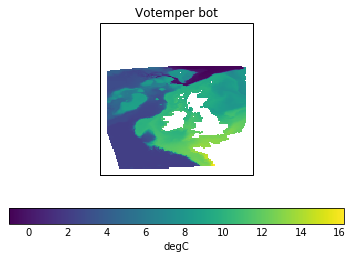

In [46]:
qplt.pcolormesh(bottom_nemo_t[0])

In [47]:
cube_all_bottom = iris.load_cube(file_bottom)
try:
    iris.coord_categorisation.add_year(cube_all_bottom, 'time', name='year')
except:
    pass

cube_all_bottom.data = np.ma.masked_where(cube_all_bottom.data == 9.96920997e+36, cube_all_bottom.data)
# cube_bottom = cube_all_bottom[np.where(cube_all_bottom.coord('year').points == year_for_basic_comparison)]
# cube_bottom = cube_bottom.collapsed('time',iris.analysis.MEAN)

In [48]:
bottom_nemo_t_dat = bottom_nemo_t.data
bottom_nemo_t_dat.mask = cube_all_bottom.data.mask[0:25,:,:]
bottom_nemo_t_dat.mask[np.where(bottom_nemo_t_dat.data > 1.0e30)] = True
bottom_nemo_t.data = bottom_nemo_t_dat

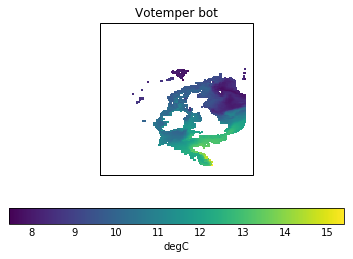

In [49]:
qplt.pcolormesh(bottom_nemo_t[0])

Note, NEMO data was regridded onto a 0.2x0.2degree grid using cdo remapbil see this script fro pre-processing of data:
  
/data/NAS-ph290/ph290/nemo_shelf/convert_to_dated_netcdf.py

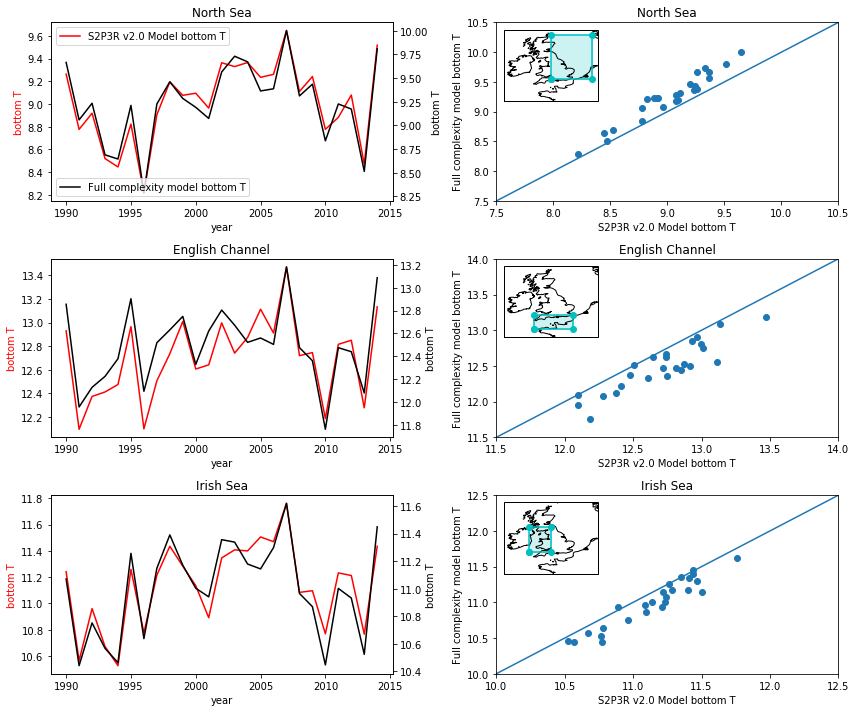

In [50]:
def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
cube_all_region_area_avg_1 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))
lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
cube_all_region_area_avg_2 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))
lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
cube_all_region_area_avg_3 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))


fig,axes= plt.subplots(nrows=3, ncols=2,figsize=(12, 10))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,0].plot(yr,y1,'r',label='S2P3R v2.0 Model bottom T')
ax00b = axes[0,0].twinx() 
ax00b.plot(yr,y2,'k',label='Full complexity model bottom T')
axes[0,0].set_title('North Sea')
axes[0,0].set_ylabel('bottom T', color='r') 
ax00b.set_ylabel('bottom T', color='k') 


axes[0,1].scatter(y1,y2,label='S2P3R v2.0 Model T v. Full complexity model bottom T')
axes[0,1].set_xlabel('S2P3R v2.0 Model bottom T')
axes[0,1].set_ylabel('Full complexity model bottom T')
axes[0,1].plot([0,100],[0,100])
axes[0,1].set_xlim([7.5,10.5])
axes[0,1].set_ylim([7.5,10.5])
axes[0,1].set_title('North Sea')

yr,y1,y2 = common_years(cube_all_region_area_avg_2,obs_cube_all_region_area_avg_2)

axes[1,0].plot(yr,y1,'r',label='S2P3R v2.0 Model bottom T')
ax10b = axes[1,0].twinx() 
ax10b.plot(yr,y2,'k',label='Full complexity model bottom T')
axes[1,0].set_title('English Channel')
axes[1,0].set_ylabel('bottom T', color='r') 
ax10b.set_ylabel('bottom T', color='k') 

axes[1,1].scatter(y1,y2,label='S2P3R v2.0 Model T v. Full complexity model bottom T')
axes[1,1].set_xlabel('S2P3R v2.0 Model bottom T')
axes[1,1].set_ylabel('Full complexity model bottom T')
axes[1,1].plot([0,100],[0,100])
axes[1,1].set_xlim([11.5,14.0])
axes[1,1].set_ylim([11.5,14.0])
axes[1,1].set_title('English Channel')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[2,0].plot(yr,y1,'r',label='S2P3R v2.0 Model bottom T')
ax20b = axes[2,0].twinx() 
ax20b.plot(yr,y2,'k',label='Full complexity model bottom T')
axes[2,0].set_title('Irish Sea')
axes[2,0].set_ylabel('bottom T', color='r') 
ax20b.set_ylabel('bottom T', color='k') 

axes[2,1].scatter(y1,y2,label='S2P3R v2.0 Model T v. Full complexity model bottom T')
axes[2,1].set_xlabel('S2P3R v2.0 Model bottom T')
axes[2,1].set_ylabel('Full complexity model bottom T')
axes[2,1].plot([0,100],[0,100])
axes[2,1].set_xlim([10,12.5])
axes[2,1].set_ylim([10,12.5])
axes[2,1].set_title('Irish Sea')

axes[0,0].legend(fancybox=True)
ax00b.legend(loc=3,fancybox=True)

axes[0,0].set_xlabel('year', color='k') 
axes[1,0].set_xlabel('year', color='k') 
axes[2,0].set_xlabel('year', color='k') 


inset_x = 0
inset_y = 1
inset_size = 0.4

inset_ax1 = plt.axes([0, 0, 1, 1], projection=projection)
inset_ax1.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax1.coastlines('50m')
ip1 = InsetPosition(axes[0,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax1.set_axes_locator(ip1)
lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax1.plot(x, y, 'c',marker='o', transform=projection)
inset_ax1.fill(x, y, color='c', transform=projection, alpha=0.2)


inset_ax2 = plt.axes([0, 0, 2, 2], projection=projection)
inset_ax2.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax2.coastlines('50m')
ip2 = InsetPosition(axes[1,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax2.set_axes_locator(ip2)
lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax2.plot(x, y, 'c',marker='o', transform=projection)
inset_ax2.fill(x, y, color='c', transform=projection, alpha=0.2)


inset_ax3 = plt.axes([0, 0, 3, 3], projection=projection)
inset_ax3.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax3.coastlines('50m')
ip3 = InsetPosition(axes[2,1], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax3.set_axes_locator(ip3)
lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
x3, y3 = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax3.plot(x3, y3, 'c',marker='o', transform=projection)
inset_ax3.fill(x3, y3, color='c', transform=projection, alpha=0.2)

plt.tight_layout()


plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/uk_bottomT_validation1.pdf')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/uk_bottomT_validation1.png')
plt.tight_layout()




In [51]:
cube_all_region_area_avg_1 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))




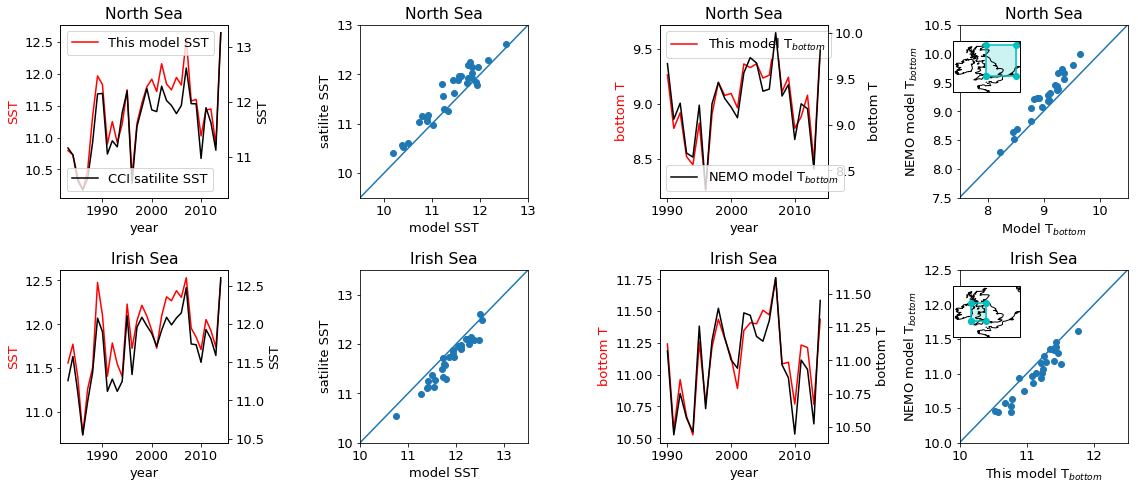

In [73]:
projection=ccrs.PlateCarree()

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]





def area_percentile(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.PERCENTILE, percent=[95])


def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

plotting_range = [1982,2015]

lon_west = -3.5
lon_east = 5.0
lat_south = 51
lat_north = 59
cube_all_region_area_avg_1 = area_percentile(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_percentile(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

cube_all_region_area_avg_1 = select_range(cube_all_region_area_avg_1, plotting_range)
obs_cube_all_region_area_avg_1 = select_range(obs_cube_all_region_area_avg_1, plotting_range)

lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
cube_all_region_area_avg_2 = area_percentile(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_percentile(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

cube_all_region_area_avg_2 = select_range(cube_all_region_area_avg_2, plotting_range)
obs_cube_all_region_area_avg_2 = select_range(obs_cube_all_region_area_avg_2, plotting_range)

lon_west = -6.5
lon_east = -2.5
lat_south = 52.0
lat_north = 55.5
cube_all_region_area_avg_3 = area_percentile(extract_region(model_region_regridded,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_percentile(extract_region(obs_region,lon_west,lon_east,lat_south,lat_north))

cube_all_region_area_avg_3 = select_range(cube_all_region_area_avg_3, plotting_range)
obs_cube_all_region_area_avg_3 = select_range(obs_cube_all_region_area_avg_3, plotting_range)



fig,axes= plt.subplots(nrows=2, ncols=4,figsize=(16, 7))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,0].plot(yr,y1,'r',label='This model SST')
ax00b = axes[0,0].twinx() 
ax00b.plot(yr,y2,'k',label='CCI satilite SST')
axes[0,0].set_title('North Sea')
axes[0,0].set_ylabel('SST', color='r') 
ax00b.set_ylabel('SST', color='k') 


axes[0,1].scatter(y1,y2,label='Model SST v. satilite SST')
axes[0,1].set_xlabel('model SST')
axes[0,1].set_ylabel('satilite SST')
axes[0,1].plot([0,100],[0,100])
axes[0,1].set_xlim([9.5,13])
axes[0,1].set_ylim([9.5,13])
axes[0,1].set_title('North Sea')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[1,0].plot(yr,y1,'r',label='Model SST')
ax20b = axes[1,0].twinx() 
ax20b.plot(yr,y2,'k',label='CCI satilite SST')
axes[1,0].set_title('Irish Sea')
axes[1,0].set_ylabel('SST', color='r') 
ax20b.set_ylabel('SST', color='k') 

axes[1,1].scatter(y1,y2,label='Model SST v. satilite SST')
axes[1,1].set_xlabel('model SST')
axes[1,1].set_ylabel('satilite SST')
axes[1,1].plot([0,100],[0,100])
axes[1,1].set_xlim([10.0,13.5])
axes[1,1].set_ylim([10.0,13.5])
axes[1,1].set_title('Irish Sea')

axes[0,0].legend(loc=2,fancybox=True)
ax00b.legend(loc=3,fancybox=True)

axes[0,0].set_xlabel('year', color='k') 
axes[1,0].set_xlabel('year', color='k') 

############################################

lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
cube_all_region_area_avg_1 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_1 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))
lon_west = -5.5
lon_east = 1.5
lat_south = 48.5
lat_north = 51.0
cube_all_region_area_avg_2 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_2 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))
lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
cube_all_region_area_avg_3 = area_avg(extract_region(cube_all_bottom,lon_west,lon_east,lat_south,lat_north))
obs_cube_all_region_area_avg_3 = area_avg(extract_region(bottom_nemo_t,lon_west,lon_east,lat_south,lat_north))

yr,y1,y2 = common_years(cube_all_region_area_avg_1,obs_cube_all_region_area_avg_1)

axes[0,2].plot(yr,y1,'r',label='This model T$_{bottom}$')
ax00b = axes[0,2].twinx() 
ax00b.plot(yr,y2,'k',label='NEMO model T$_{bottom}$')
axes[0,2].set_title('North Sea')
axes[0,2].set_ylabel('bottom T', color='r') 
ax00b.set_ylabel('bottom T', color='k') 


axes[0,3].scatter(y1,y2,label='S2P3R v2.0 Model T v. Full complexity model bottom T')
axes[0,3].set_xlabel('Model T$_{bottom}$')
axes[0,3].set_ylabel('NEMO model T$_{bottom}$')
axes[0,3].plot([0,100],[0,100])
axes[0,3].set_xlim([7.5,10.5])
axes[0,3].set_ylim([7.5,10.5])
axes[0,3].set_title('North Sea')

yr,y1,y2 = common_years(cube_all_region_area_avg_3,obs_cube_all_region_area_avg_3)

axes[1,2].plot(yr,y1,'r',label='This model T$_{bottom}$')
ax20b = axes[1,2].twinx() 
ax20b.plot(yr,y2,'k',label='NEMO model T$_{bottom}$')
axes[1,2].set_title('Irish Sea')
axes[1,2].set_ylabel('bottom T', color='r') 
ax20b.set_ylabel('bottom T', color='k') 

axes[1,3].scatter(y1,y2,label='S2P3R v2.0 Model T v.\nFull complexity model bottom T')
axes[1,3].set_xlabel('This model T$_{bottom}$')
axes[1,3].set_ylabel('NEMO model T$_{bottom}$')
axes[1,3].plot([0,100],[0,100])
axes[1,3].set_xlim([10,12.5])
axes[1,3].set_ylim([10,12.5])
axes[1,3].set_title('Irish Sea')

axes[0,2].legend(loc=2,fancybox=True)
ax00b.legend(loc=3,fancybox=True)

axes[0,2].set_xlabel('year', color='k') 
axes[1,2].set_xlabel('year', color='k') 


inset_x = 0
inset_y = 1
inset_size = 0.4

inset_ax1 = plt.axes([0, 0, 1, 1], projection=projection)
inset_ax1.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax1.coastlines('50m')
ip1 = InsetPosition(axes[0,3], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax1.set_axes_locator(ip1)
lon_west = -2.5
lon_east = 5.0
lat_south = 51
lat_north = 59
x, y = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax1.plot(x, y, 'c',marker='o', transform=projection)
inset_ax1.fill(x, y, color='c', transform=projection, alpha=0.2)

inset_ax3 = plt.axes([0, 0, 3, 3], projection=projection)
inset_ax3.set_extent([-11, 6, 47, 60], ccrs.PlateCarree())
inset_ax3.coastlines('50m')
ip3 = InsetPosition(axes[1,3], [inset_x - inset_size*0.1,
                        inset_y - inset_size*1.1,
                        inset_size,
                        inset_size])
inset_ax3.set_axes_locator(ip3)
lon_west = -6.5
lon_east = -2.5
lat_south = 51.0
lat_north = 55.5
x3, y3 = [lon_west, lon_west, lon_east, lon_east, lon_west], [lat_south, lat_north, lat_north, lat_south,lat_south]
inset_ax3.plot(x3, y3, 'c',marker='o', transform=projection)
inset_ax3.fill(x3, y3, color='c', transform=projection, alpha=0.2)

plt.tight_layout()


plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/uk_validation1.pdf')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/uk_validation1.png')
plt.tight_layout()
